<a href="https://colab.research.google.com/github/sovdeeth/asp-360-group-56/blob/main/Hurricane_Path_Detection_Group_56.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('triplets.csv', header=None, skiprows = 1)

# Original data
data = []

n_rows_per_sequence = 1

for i in range(len(df) - n_rows_per_sequence):
    sequence = []
    for j in range(n_rows_per_sequence):
        sequence.extend(df.iloc[i + j].tolist())
    data.append(sequence)

# Convert to numpy array
data = np.array(data)

# Reshape data for LSTM input: (samples, time steps, features)
time_steps = 2
features = 6

X = []
y = []

# Create sequences of 2 time steps
for i in range(len(data) - time_steps):
    X.append(data[i:i + time_steps, :features])  # Input sequences of length 2 with 6 features each
    y.append(data[i + time_steps, 15:17])  # Targets: indices 15 and 16 of the next time step

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)  # Should be (number of samples, 2, 6)
print("y_train shape:", y_train.shape)  # Should be (number of samples, 2)

X_train shape: (14837, 2, 6)
y_train shape: (14837, 2)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the model
model = Sequential()

# First LSTM layer with 50 units
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, features)))

# Second LSTM layer with 50 units
model.add(LSTM(50, activation='relu'))

# First Dense layer with 25 units
model.add(Dense(10, activation='relu'))

# First Dense layer with 25 units
model.add(Dense(5, activation='relu'))

# Second Dense layer with 2 units (output layer)
model.add(Dense(2))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Summary of the model
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 2, 50)             11400     
                                                                 
 lstm_13 (LSTM)              (None, 50)                20200     
                                                                 
 dense_17 (Dense)            (None, 10)                510       
                                                                 
 dense_18 (Dense)            (None, 5)                 55        
                                                                 
 dense_19 (Dense)            (None, 2)                 12        
                                                                 
Total params: 32177 (125.69 KB)
Trainable params: 32177 (125.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

Epoch 1/50
464/464 [==============================] - 13s 14ms/step - loss: 246.2211 - mse: 246.2211 - val_loss: 75.0717 - val_mse: 75.0717
Epoch 2/50
464/464 [==============================] - 6s 14ms/step - loss: 65.4996 - mse: 65.4996 - val_loss: 69.7636 - val_mse: 69.7636
Epoch 3/50
464/464 [==============================] - 7s 14ms/step - loss: 63.5073 - mse: 63.5073 - val_loss: 64.7582 - val_mse: 64.7582
Epoch 4/50
464/464 [==============================] - 3s 6ms/step - loss: 62.3829 - mse: 62.3829 - val_loss: 65.1205 - val_mse: 65.1205
Epoch 5/50
464/464 [==============================] - 3s 7ms/step - loss: 62.2046 - mse: 62.2046 - val_loss: 66.7835 - val_mse: 66.7835
Epoch 6/50
464/464 [==============================] - 4s 8ms/step - loss: 61.9630 - mse: 61.9630 - val_loss: 64.5144 - val_mse: 64.5144
Epoch 7/50
464/464 [==============================] - 3s 6ms/step - loss: 61.1453 - mse: 61.1453 - val_loss: 64.4121 - val_mse: 64.4121
Epoch 8/50
464/464 [======================

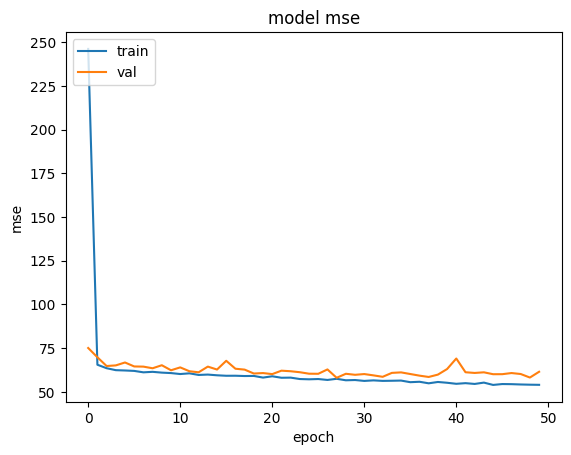

In [ ]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

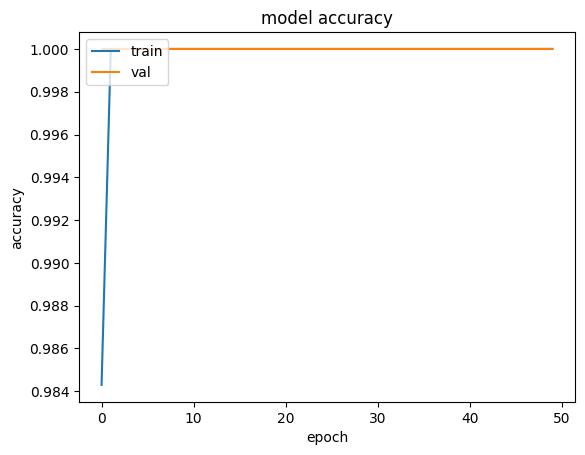

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()